**BILO BAGE BILIYAN DA KI KAREGI BAGE BAGE BILIYAN DA KI KAREGI**
<BR>ANS: *** *********

**Add all imports here**
**DEKH LENA SAARE IMPORTS SAARE YAHAN DAALNE HAIN VVVVVVVVVVVVVIMP**

In [8]:
import numpy as np
import pandas as pd
# from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **Loading the dataset**

In [9]:
# uploaded = files.upload()


In [10]:
data = pd.read_csv("cardio_train.csv")
data.drop("id",axis=1,inplace=True)
display(data)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
0         0       1  30   90.000000       0  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
...     ...     ...  ..         ...     ...  
69995     0       1  40   93.333333       0  
69996     0       1  50  106.666667       1  
69997     1       0  90  120.000000       1  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[70000 rows x 14 columns]

In [11]:
features=["ap_hi","ap_lo","PP","MAP"]
for i in features:
  data = data.drop(data[data[i]<0].index)
  data = data.drop(data[data[i]>500].index)
print(data.shape)

(68727, 14)


# **Exploratory Data Analysis**

**Multi-variate Analysis**

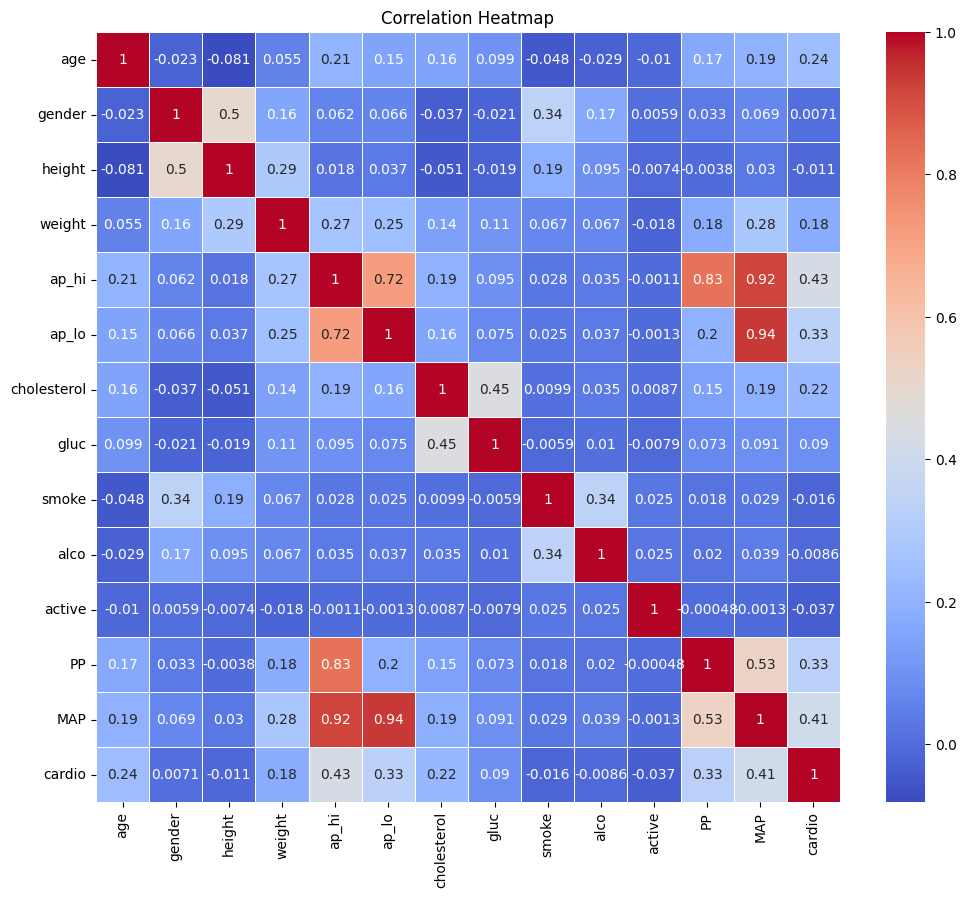

In [12]:
# Corelation HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


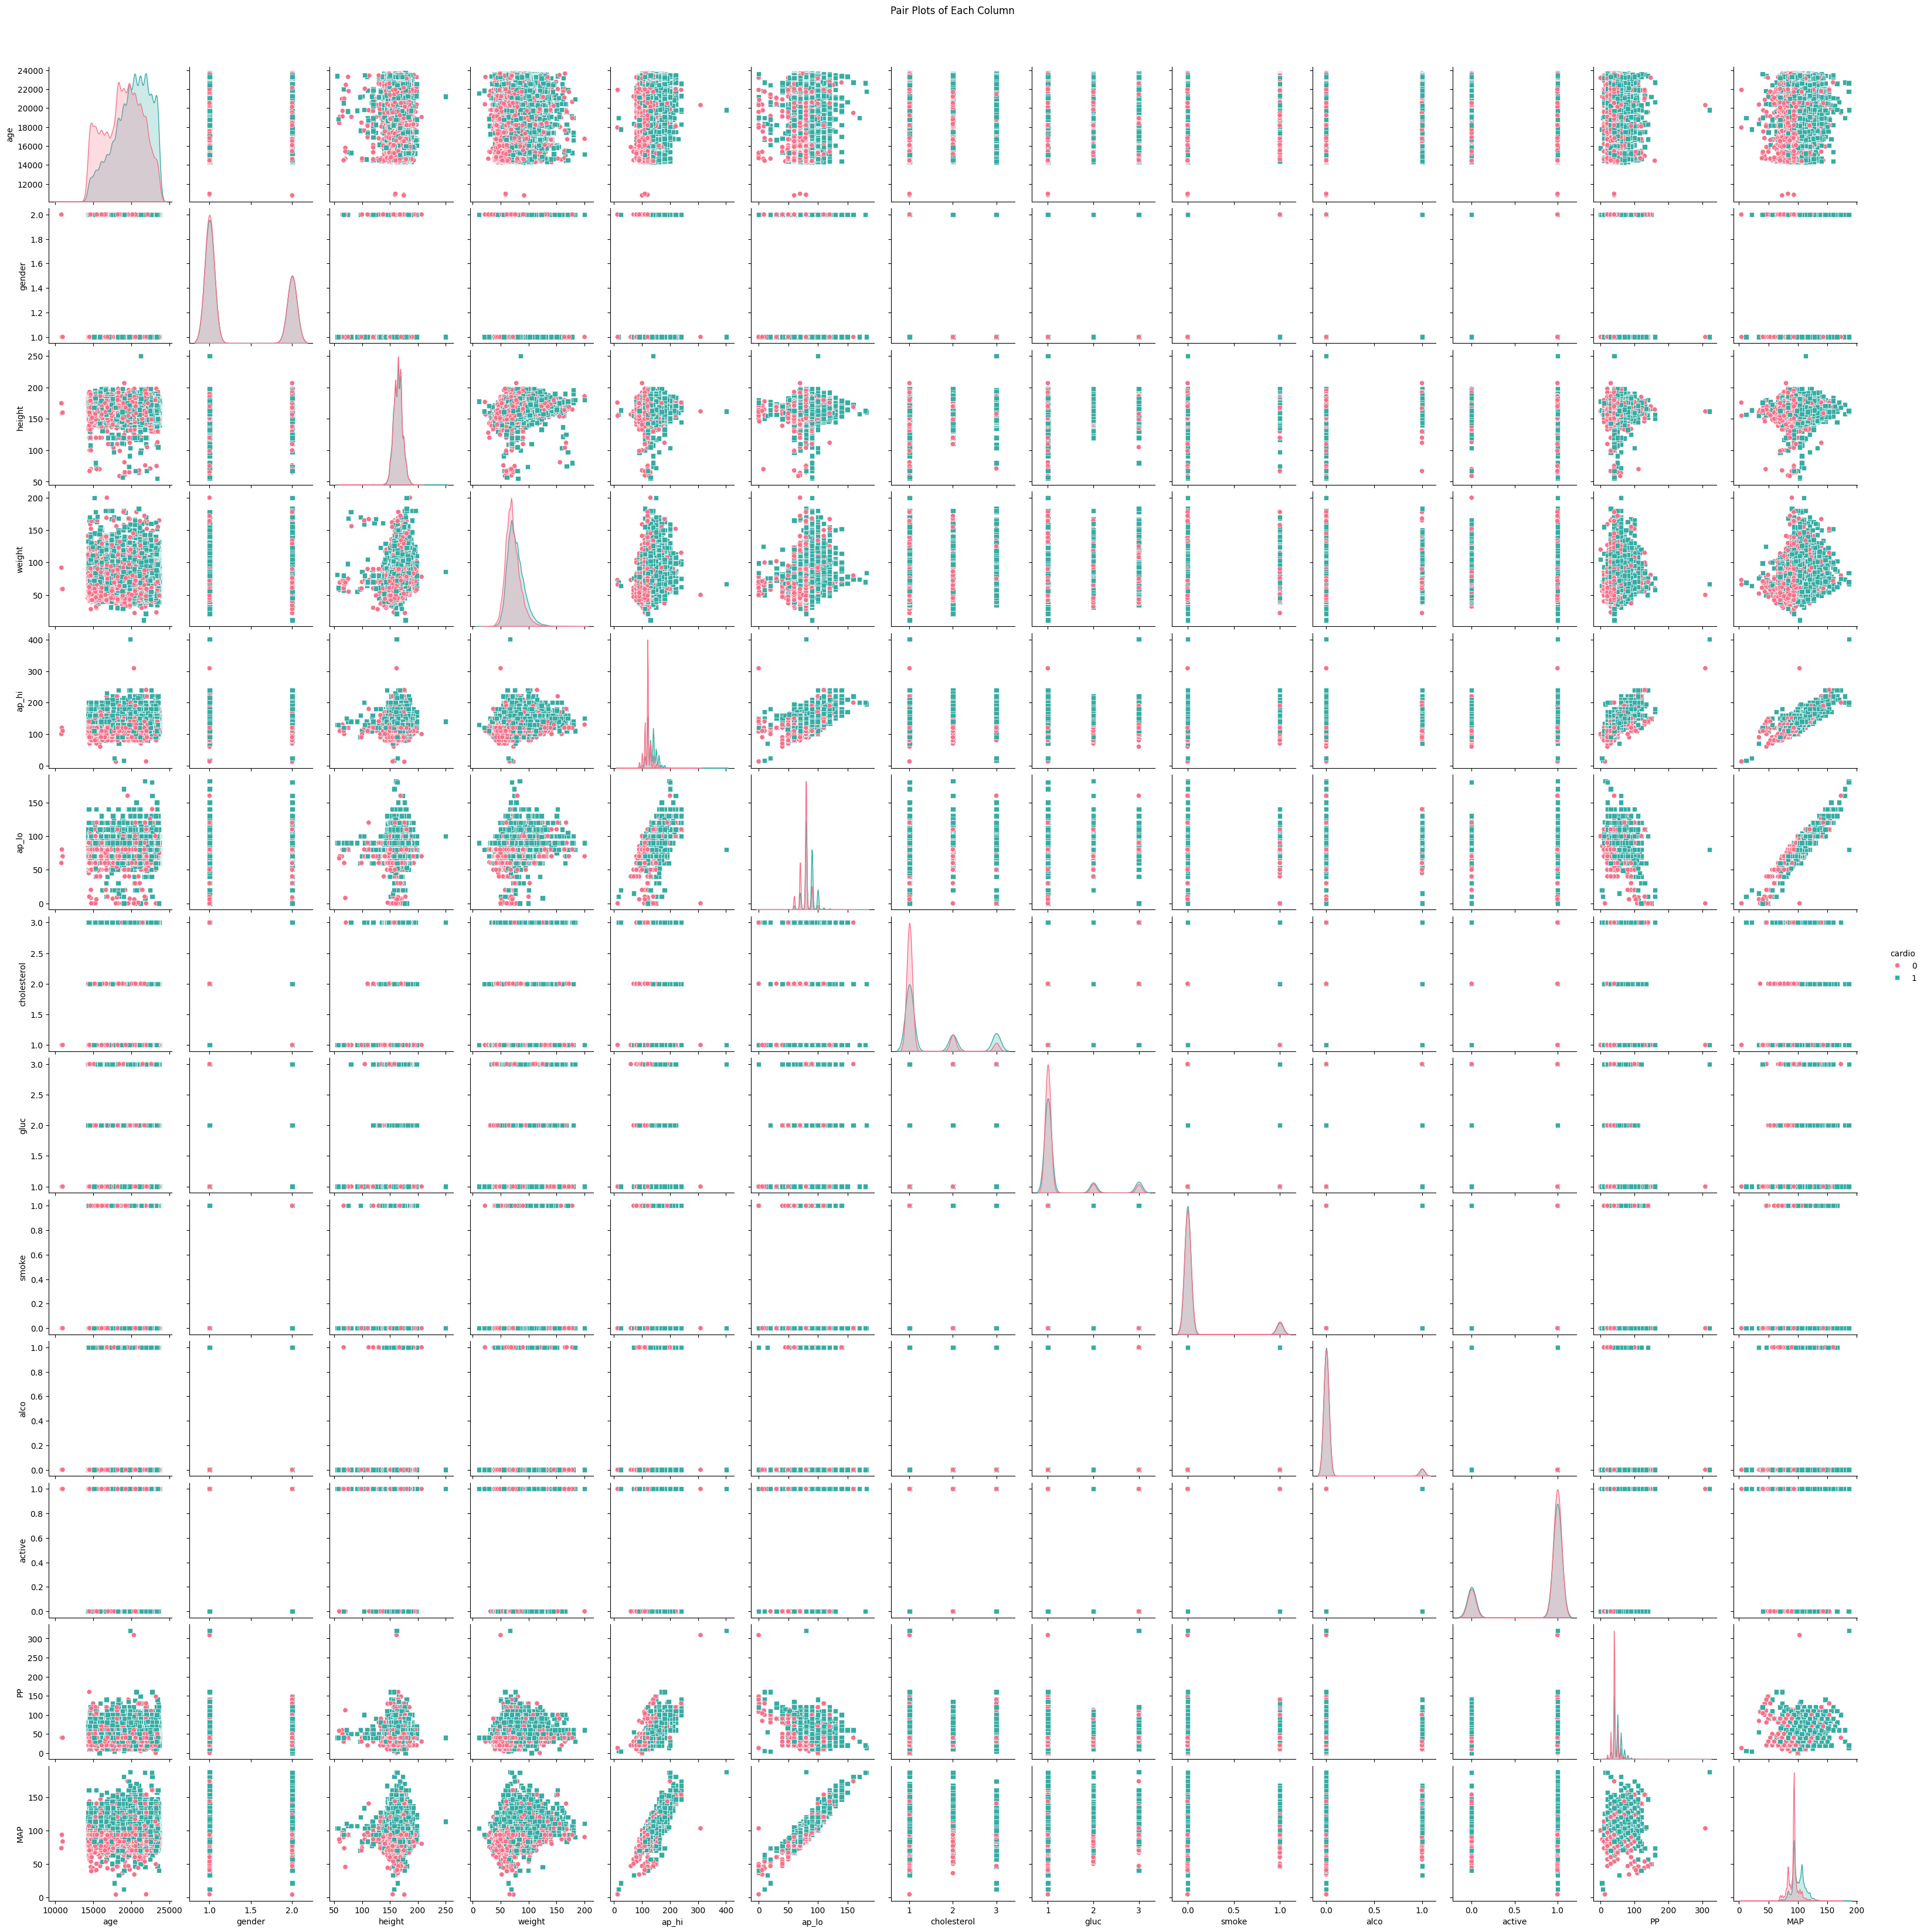

In [13]:
sns.pairplot(data, diag_kind='kde', hue='cardio', palette='husl', markers=['o', 's'])
plt.suptitle("Pair Plots of Each Column", y=1.02)
plt.show()

**Uni-Variate Analysis**

Box-Plots

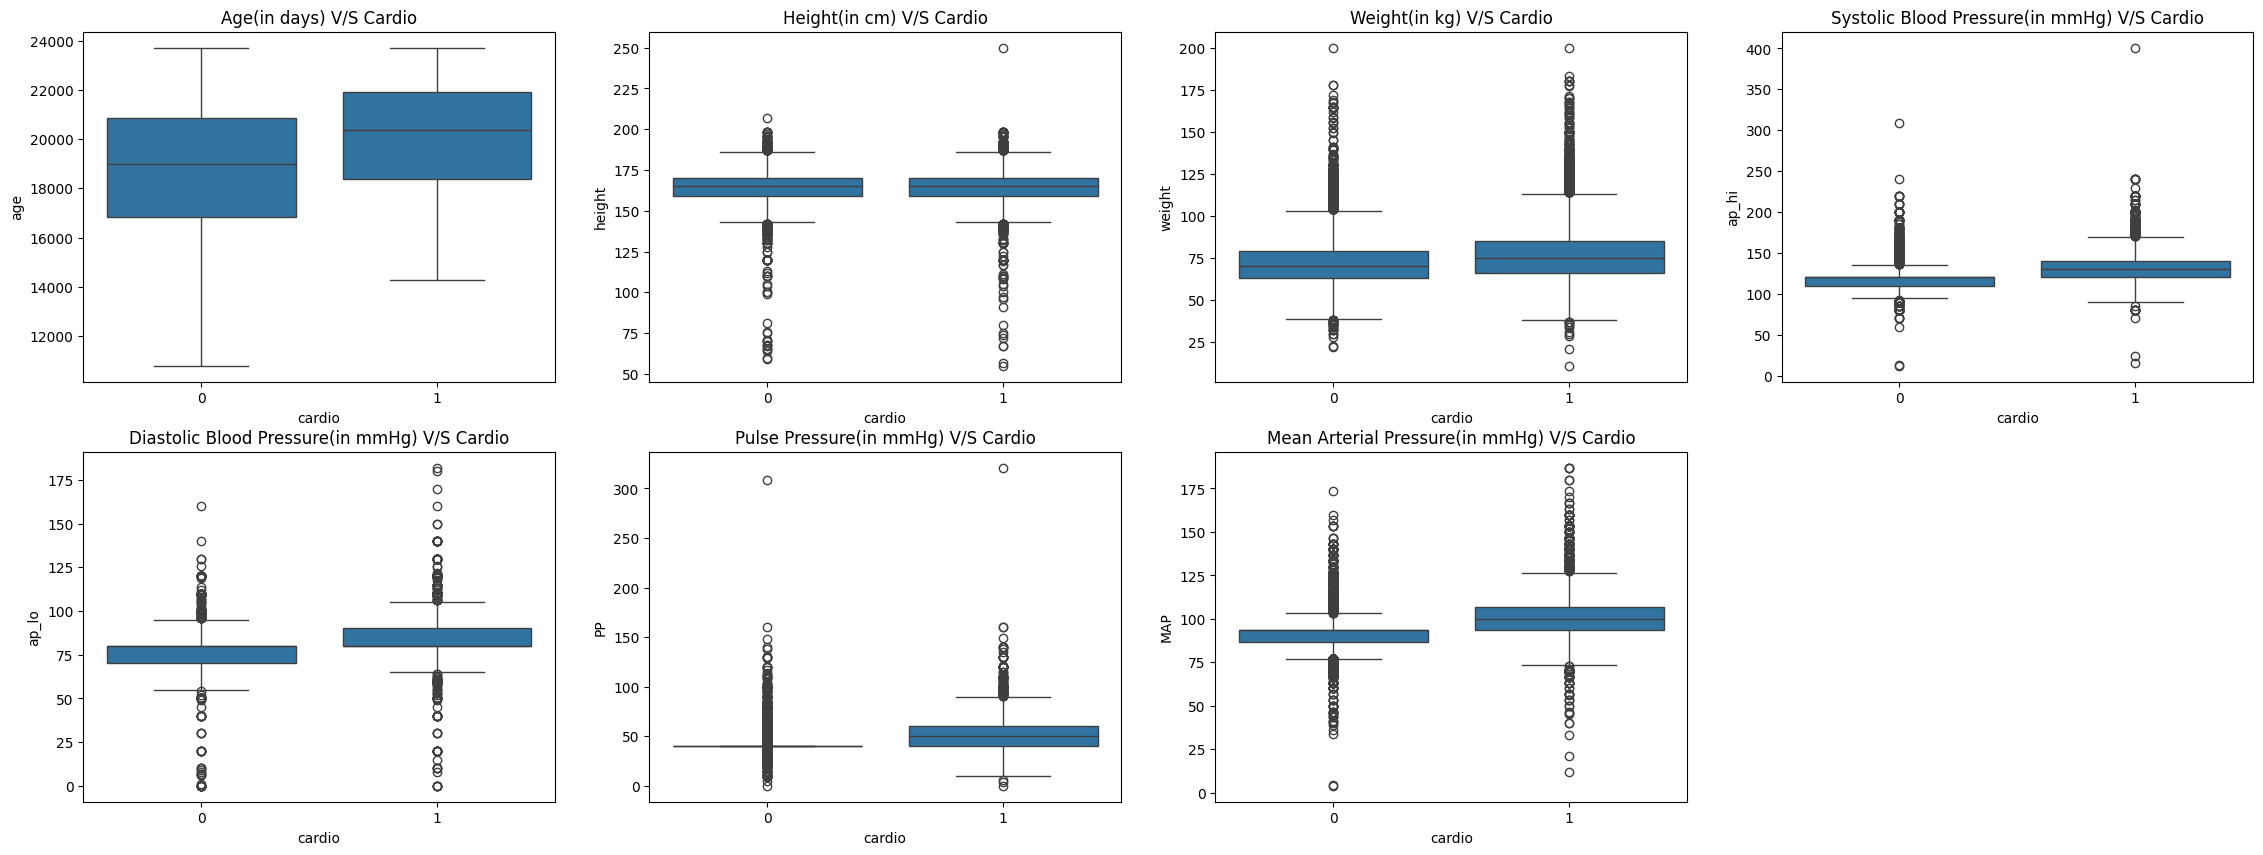

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(28, 10))
sns.boxplot(ax=axes[0,0],x="cardio",y="age",data=data)
sns.boxplot(ax=axes[0,1],x="cardio",y="height",data=data)
sns.boxplot(ax=axes[0,2],x="cardio",y="weight",data=data)
sns.boxplot(ax=axes[0,3],x="cardio",y="ap_hi",data=data)
sns.boxplot(ax=axes[1,0],x="cardio",y="ap_lo",data=data)
sns.boxplot(ax=axes[1,1],x="cardio",y="PP",data=data)
sns.boxplot(ax=axes[1,2],x="cardio",y="MAP",data=data)
axes[0,0].set_title("Age(in days) V/S Cardio")
axes[0,1].set_title("Height(in cm) V/S Cardio")
axes[0,2].set_title("Weight(in kg) V/S Cardio")
axes[0,3].set_title("Systolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,0].set_title("Diastolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,1].set_title("Pulse Pressure(in mmHg) V/S Cardio")
axes[1,2].set_title("Mean Arterial Pressure(in mmHg) V/S Cardio")
fig.delaxes(axes[1,3])
plt.show()

**People With CVD**

### **Histograms**

**Combined Histograms for the report**

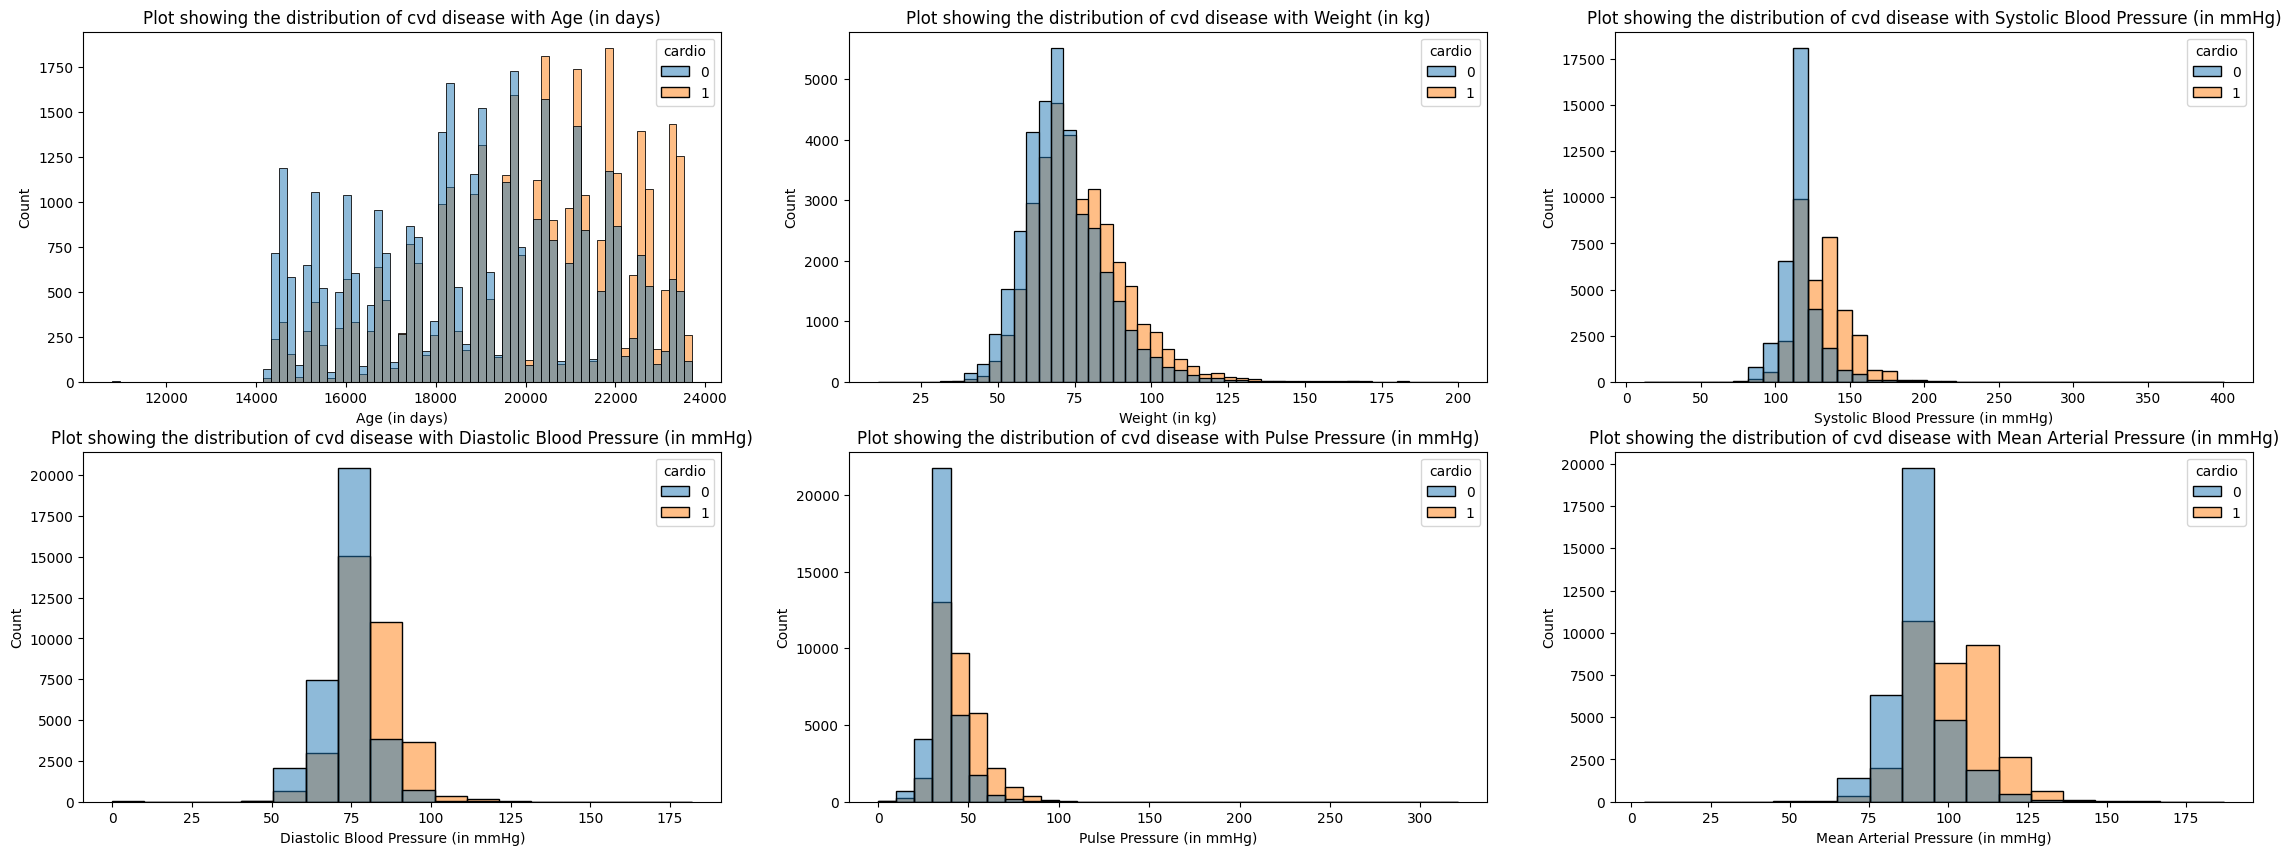

<Figure size 640x480 with 0 Axes>

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(28, 10))
sns.histplot(ax=axes[0,0],x="age",hue="cardio",data=data)
axes[0,0].set_xlabel("Age (in days)")
axes[0,0].set_title("Plot showing the distribution of cvd disease with Age (in days)")
sns.histplot(ax=axes[0,1],x="weight",hue="cardio",data=data,binwidth=4.0)
axes[0,1].set_xlabel("Weight (in kg)")
axes[0,1].set_title("Plot showing the distribution of cvd disease with Weight (in kg)")
sns.histplot(ax=axes[0,2],x="ap_hi",hue="cardio",data=data,binwidth=10.0)
axes[0,2].set_xlabel("Systolic Blood Pressure (in mmHg)")
axes[0,2].set_title("Plot showing the distribution of cvd disease with Systolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,0],x="ap_lo",hue="cardio",data=data,binwidth=10.0)
axes[1,0].set_xlabel("Diastolic Blood Pressure (in mmHg)")
axes[1,0].set_title("Plot showing the distribution of cvd disease with Diastolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,1],x="PP",hue="cardio",data=data,binwidth=10.0)
axes[1,1].set_xlabel("Pulse Pressure (in mmHg)")
axes[1,1].set_title("Plot showing the distribution of cvd disease with Pulse Pressure (in mmHg)")
sns.histplot(ax=axes[1,2],x="MAP",hue="cardio",data=data,binwidth=10.0)
axes[1,2].set_xlabel("Mean Arterial Pressure (in mmHg)")
axes[1,2].set_title("Plot showing the distribution of cvd disease with Mean Arterial Pressure (in mmHg)")
plt.figure(dpi=100)
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different age brackets.

<Figure size 640x480 with 0 Axes>

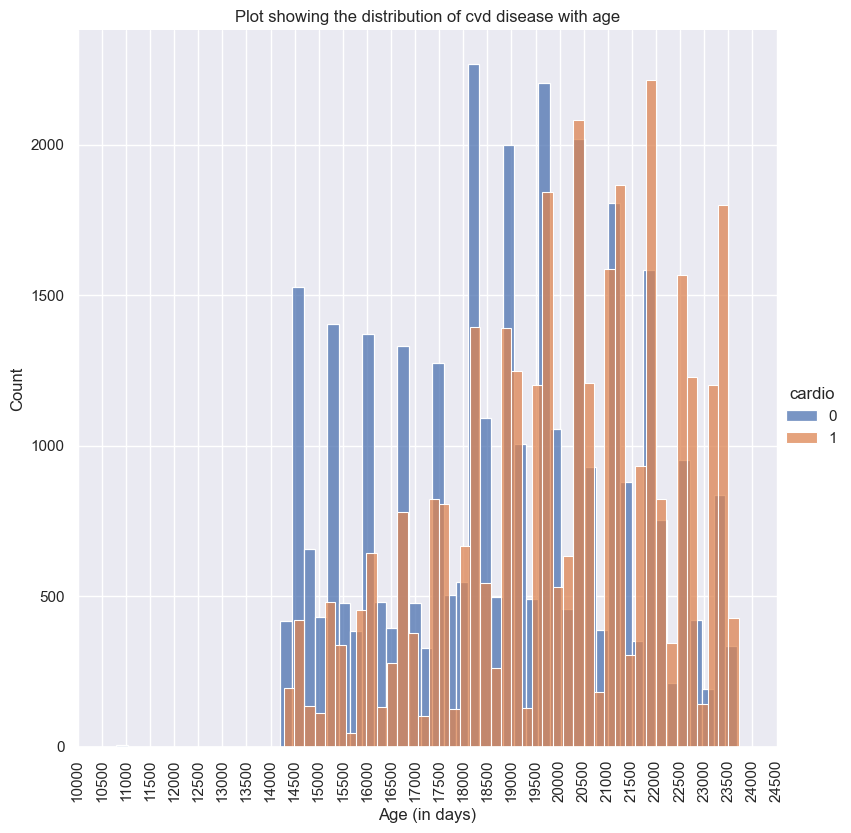

In [16]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'age').add_legend()
plt.title("Plot showing the distribution of cvd disease with age")
plt.xticks(rotation=90)
plt.xticks(np.arange(10000,25000,500))
plt.xlabel("Age (in days)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different height brackets.

<Figure size 640x480 with 0 Axes>

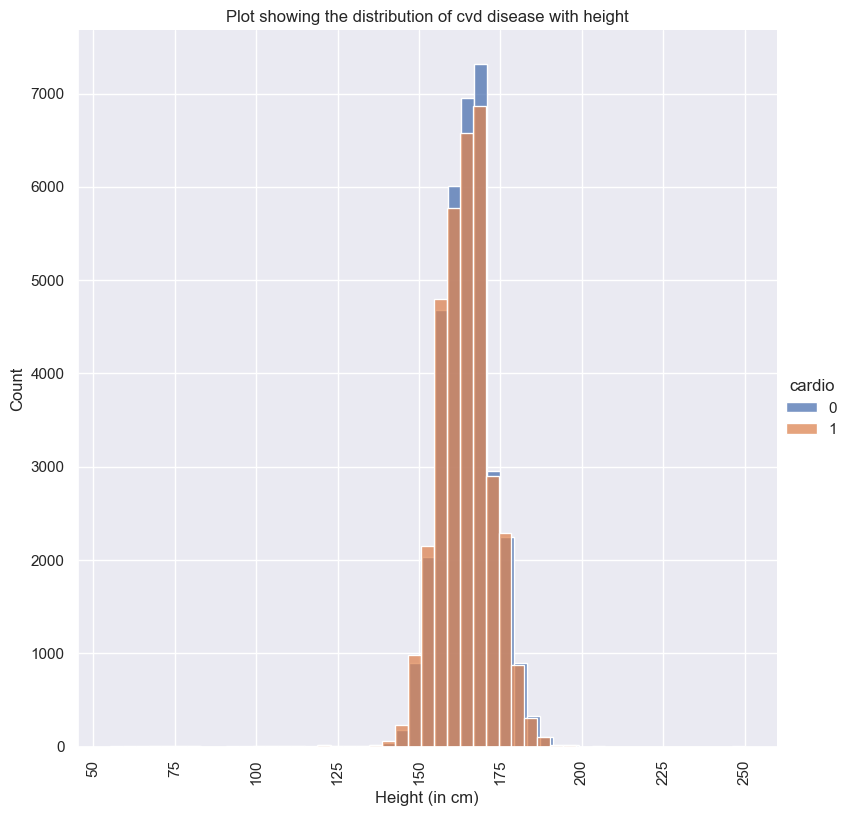

In [17]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'height',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with height")
plt.xticks(rotation=90)
plt.xlabel("Height (in cm)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different weight brackets.

<Figure size 640x480 with 0 Axes>

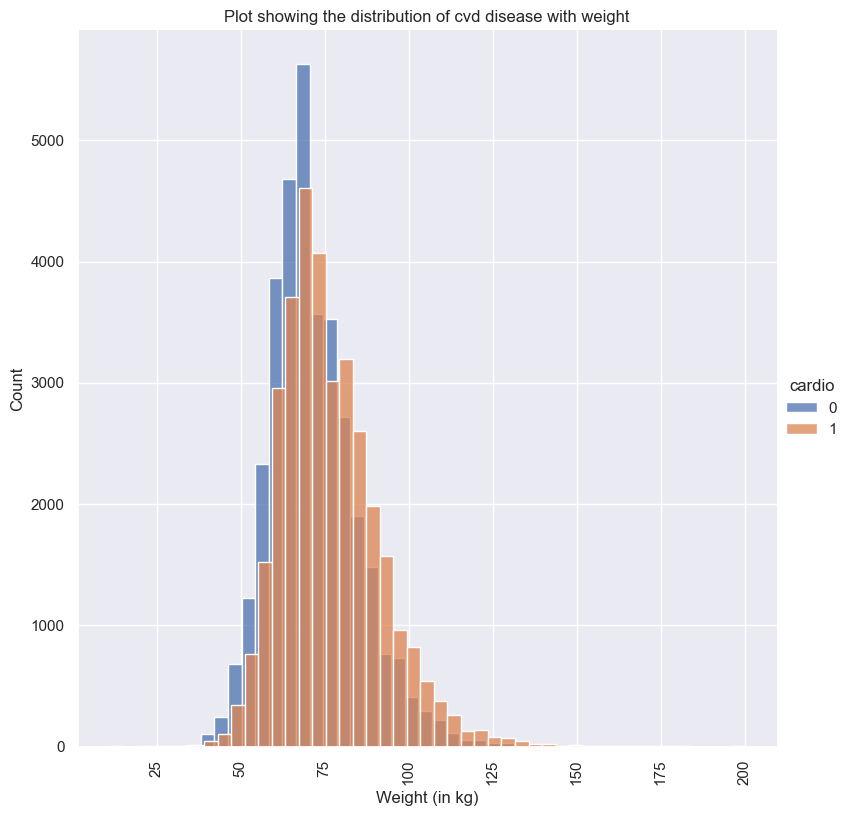

In [18]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'weight',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with weight")
plt.xticks(rotation=90)
plt.xlabel("Weight (in kg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different systolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

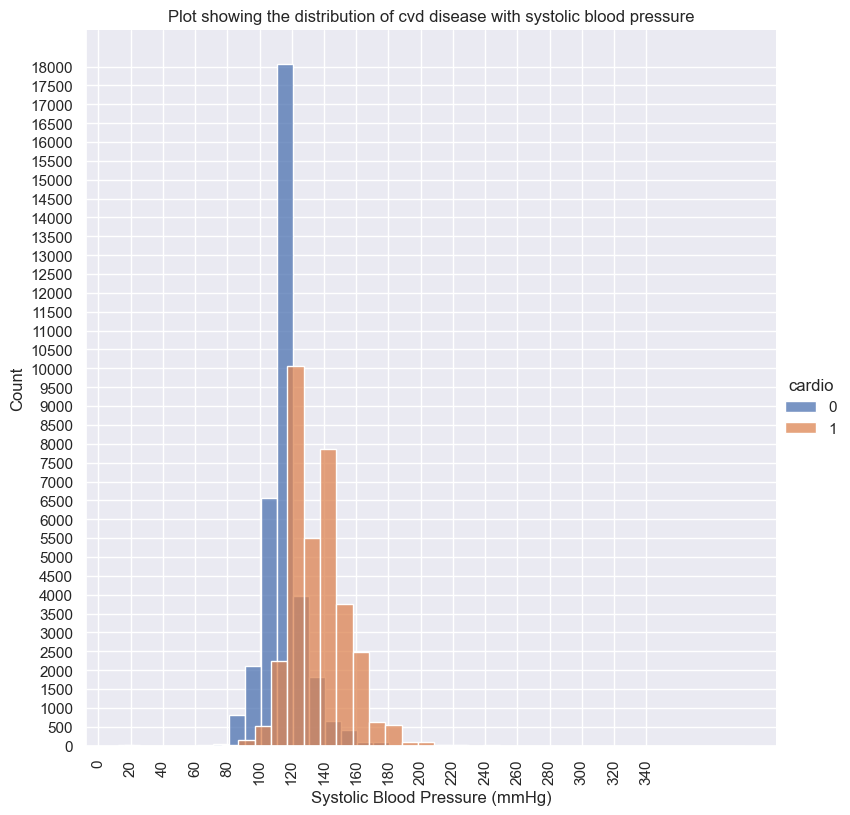

In [19]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'ap_hi',binwidth=10.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with systolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,350,20))
plt.yticks(np.arange(0,18500,500))
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different diastolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

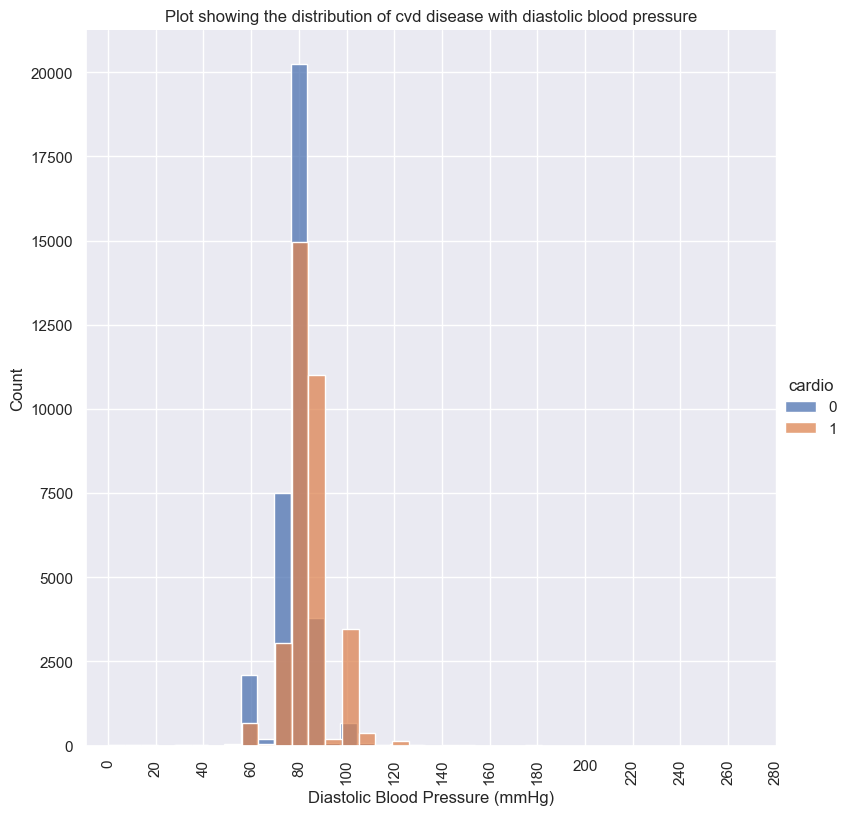

In [20]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'ap_lo',binwidth=7.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with diastolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,300,20))
# plt.yticks(np.arange(0,18500,500))
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Pulse Pressure

<Figure size 640x480 with 0 Axes>

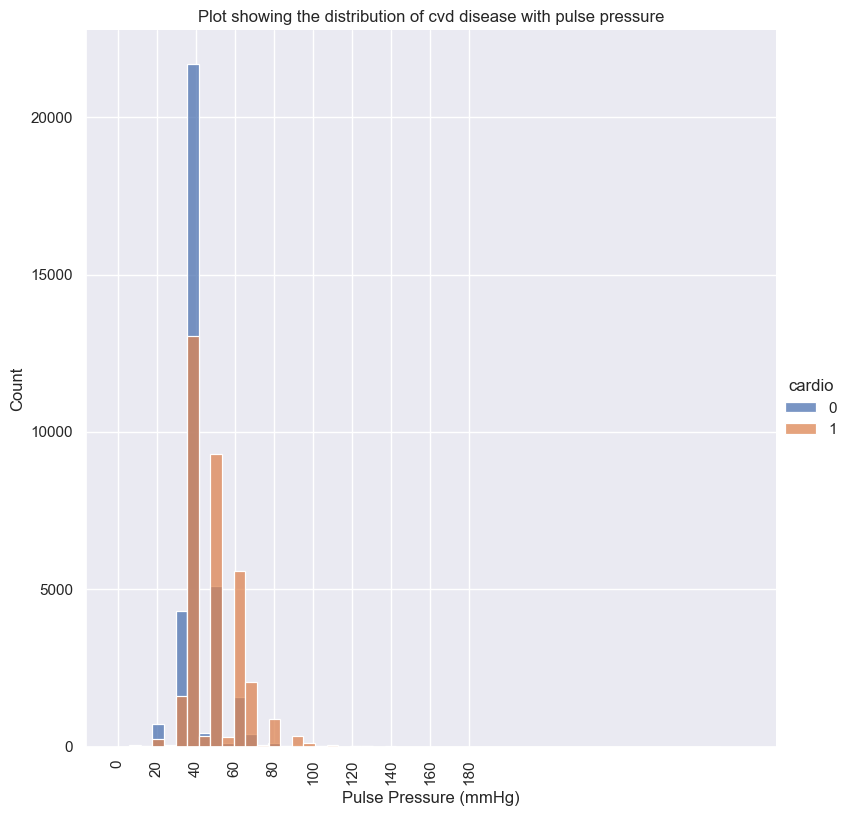

In [21]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'PP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with pulse pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Pulse Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Mean Arterial Pressure (MAP)

<Figure size 640x480 with 0 Axes>

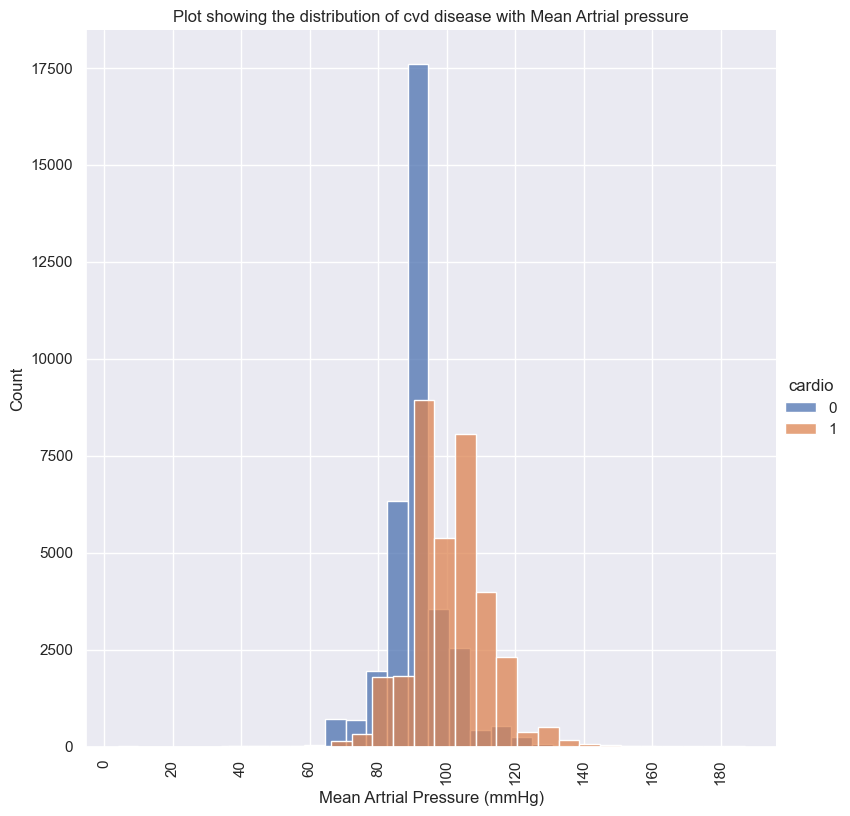

In [22]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'MAP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with Mean Artrial pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Mean Artrial Pressure (mmHg)")
plt.show()

### **Pie-Charts**

**Combined Pie-Charts for Report**

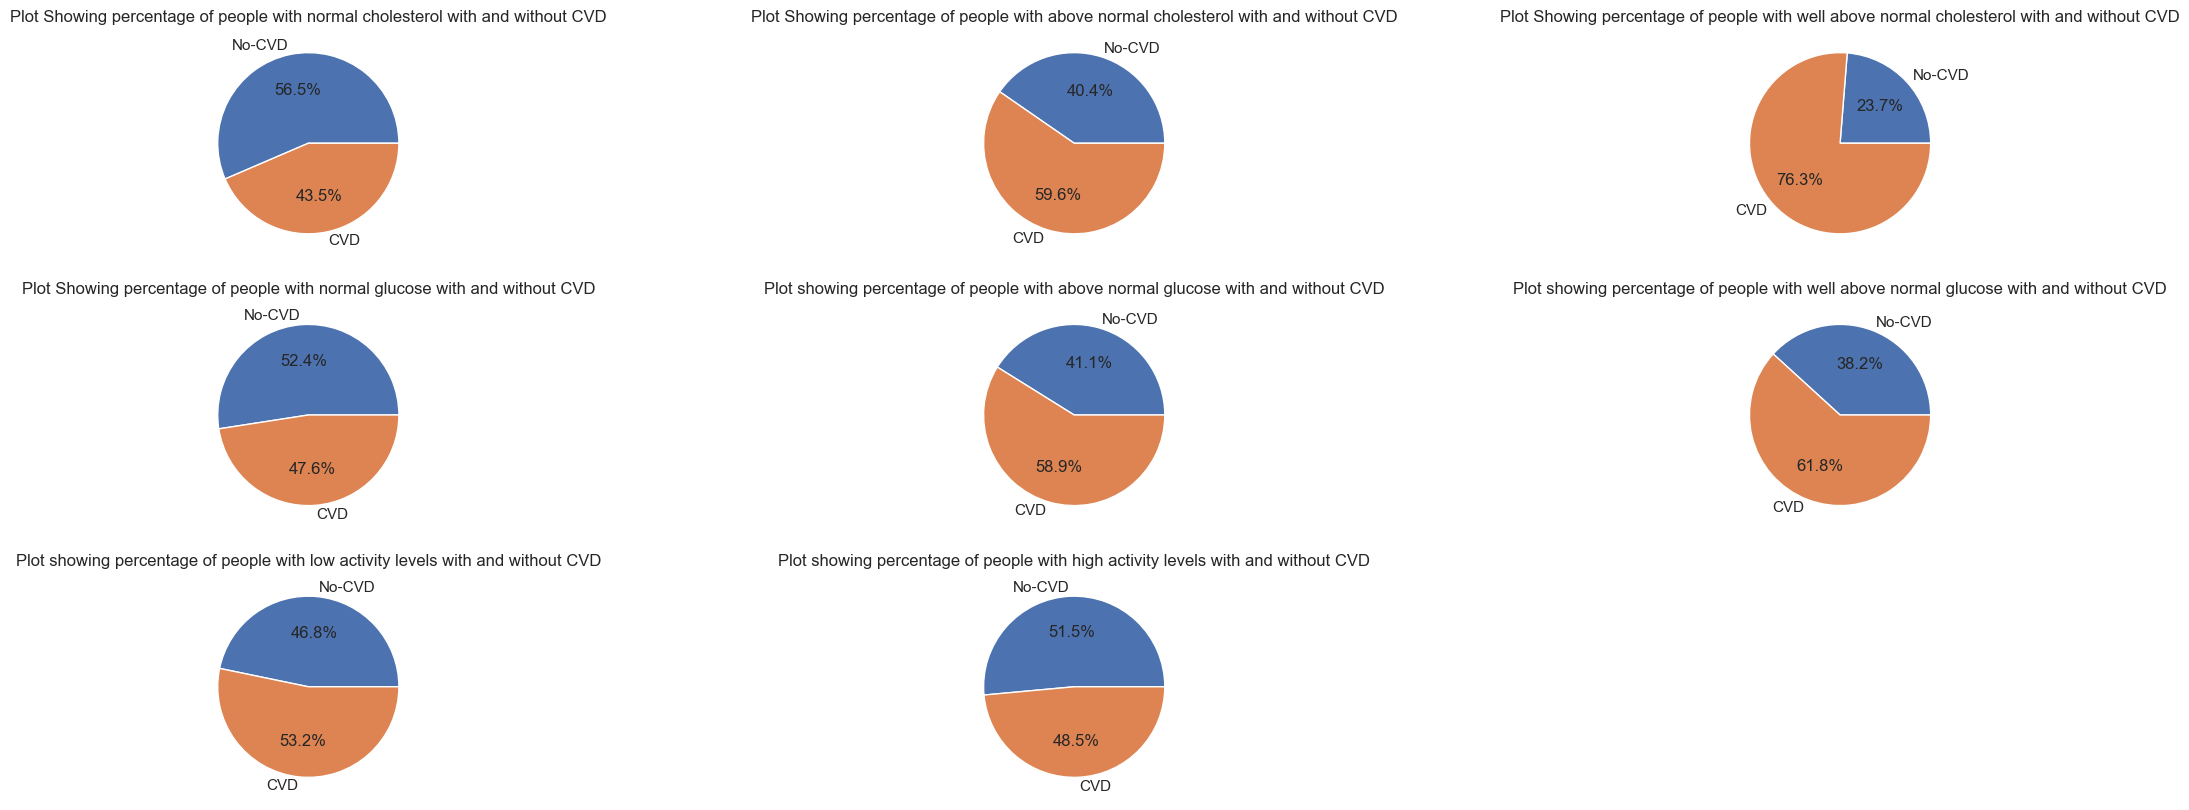

In [23]:
CVD=["No-CVD","CVD"]

count_no_cvd_cholesterol_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
count_no_cvd_cholesterol_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
count_no_cvd_cholesterol_well_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] ==3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]

count_no_cvd_glucose_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
count_no_cvd_glucose_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
count_no_cvd_glucose_well_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]


count_no_cvd_less_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
count_no_cvd_high_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]


fig, axes = plt.subplots(3, 3, figsize=(28, 10))
axes[0,0].pie(count_no_cvd_cholesterol_normal,labels=CVD,autopct='%1.1f%%')
axes[0,0].set_title("Plot Showing percentage of people with normal cholesterol with and without CVD")
axes[0,1].pie(count_no_cvd_cholesterol_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,1].set_title("Plot Showing percentage of people with above normal cholesterol with and without CVD")
axes[0,2].pie(count_no_cvd_cholesterol_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,2].set_title("Plot Showing percentage of people with well above normal cholesterol with and without CVD")
axes[1,0].pie(count_no_cvd_glucose_normal,labels=CVD,autopct='%1.1f%%')
axes[1,0].set_title("Plot Showing percentage of people with normal glucose with and without CVD")
axes[1,1].pie(count_no_cvd_glucose_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,1].set_title("Plot showing percentage of people with above normal glucose with and without CVD")
axes[1,2].pie(count_no_cvd_glucose_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,2].set_title("Plot showing percentage of people with well above normal glucose with and without CVD")
axes[2,0].pie(count_no_cvd_less_activity,labels=CVD,autopct='%1.1f%%')
axes[2,0].set_title("Plot showing percentage of people with low activity levels with and without CVD")
axes[2,1].pie(count_no_cvd_high_activity,labels=CVD,autopct='%1.1f%%')
axes[2,1].set_title("Plot showing percentage of people with high activity levels with and without CVD")
fig.delaxes(axes[2,2])
plt.show()

# *Gender*

Pie-Chart percenatges of female with and without CVD

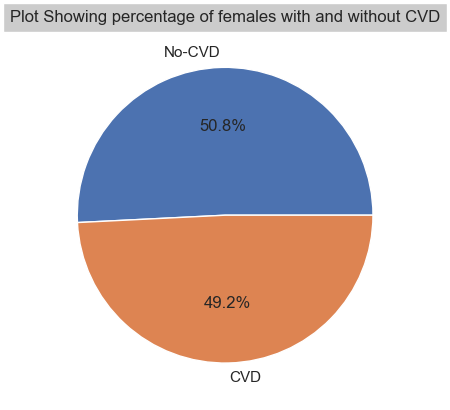

In [24]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 1)]),len(data[(data['cardio'] == 1) & (data['gender'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of females with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


Plot Showing percentage of males with and without CVD

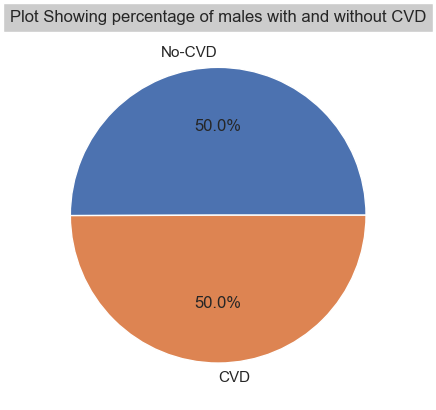

In [25]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 2)]),len(data[(data['cardio'] == 1) & (data['gender'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of males with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


# *Cholestrol*

% age of people with normal cholestrol,having CVD or not having CVD

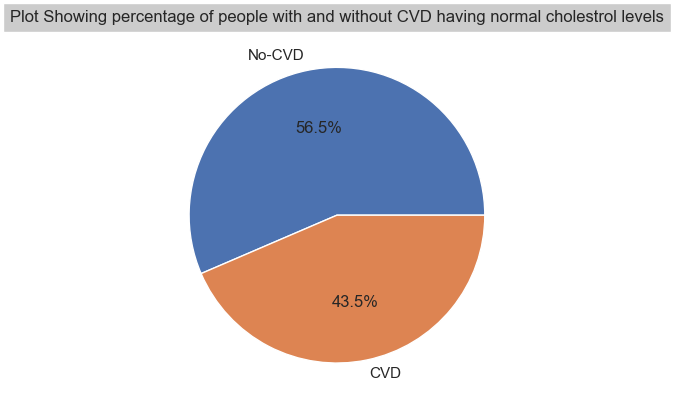

In [26]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal cholestrol,having CVD or not having CVD

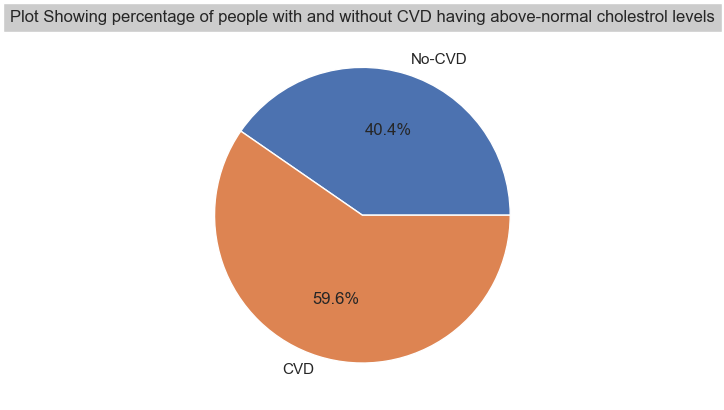

In [27]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal cholestrol,having CVD or not having CVD

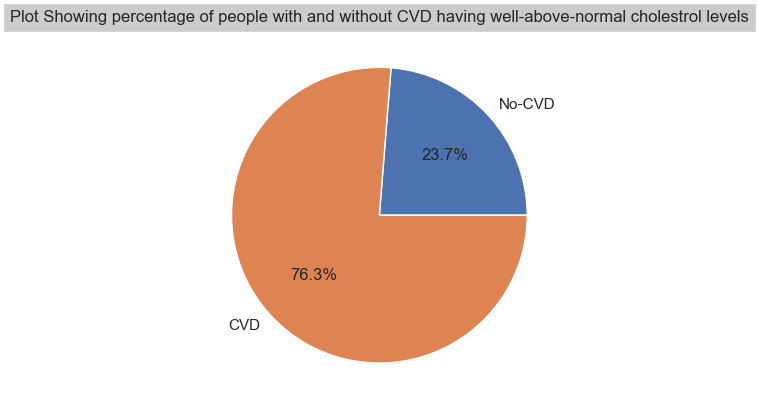

In [28]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well-above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Glucose*

% age of people with normal glucose,having CVD or not having CVD

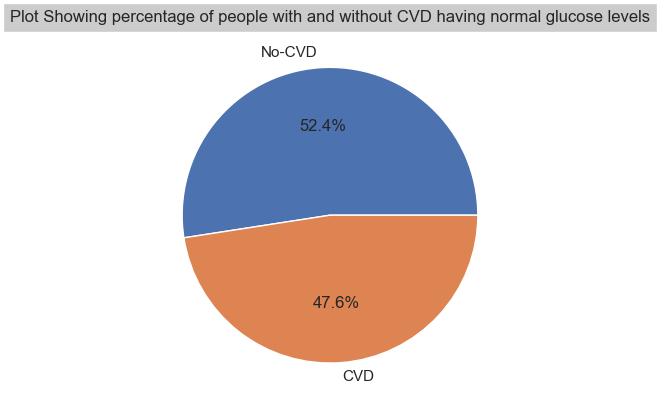

In [29]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal glucose,having CVD or not having CVD

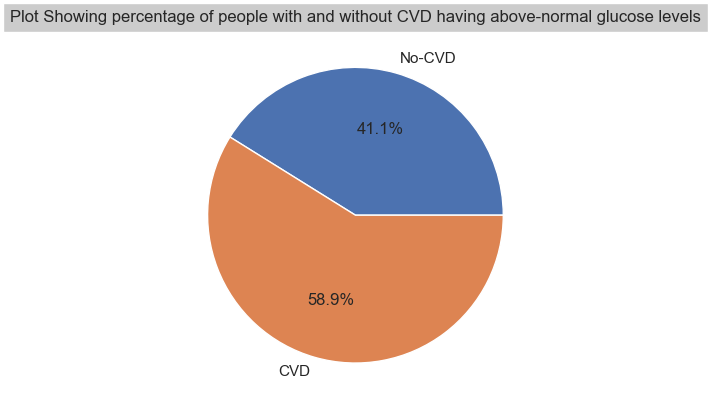

In [30]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal glucose,having CVD or not having CVD

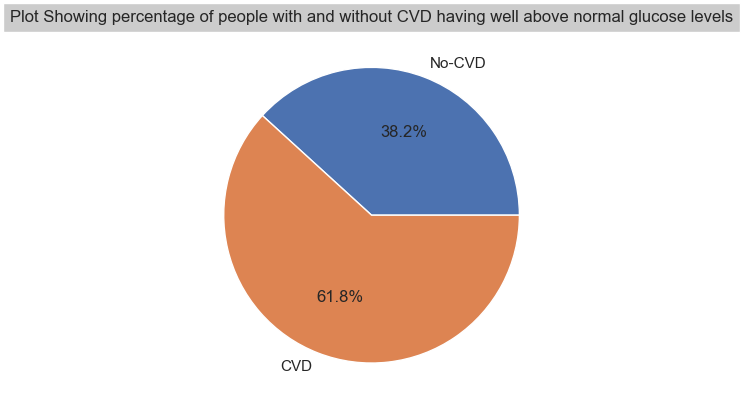

In [31]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well above normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Life-Style*

% age of people with lazy lifestyle,having CVD or not having CVD

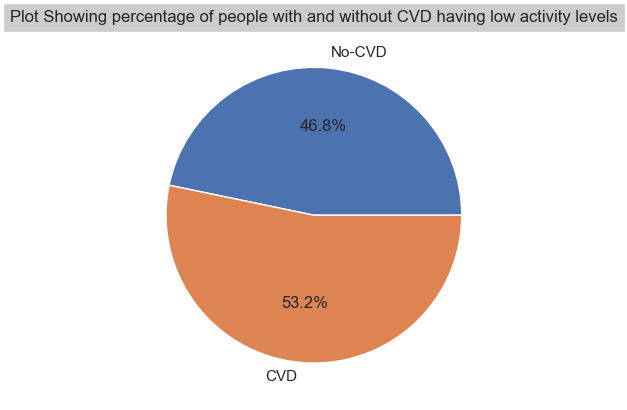

In [32]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having low activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with active lifestyle,having CVD or not having CVD

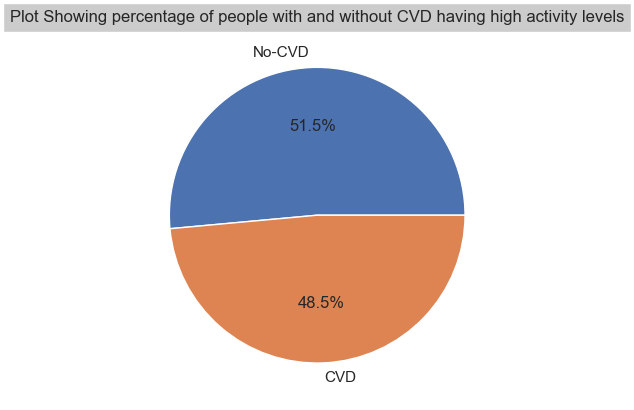

In [33]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having high activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# **Analysis of the dataset**

**People with  no CVD**

In [34]:
mask_0 = (data['cardio']==0)


print("People with no CVD")

# Various Factors for patients without CVD
age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
age_min_no_cvd = float(data.loc[mask_0,['age']].min())
age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
age_median_no_cvd = float(data.loc[mask_0,['age']].median())

weight_max_no_cvd =  float(data.loc[mask_0,['weight']].max())
weight_min_no_cvd = float(data.loc[mask_0,['weight']].min())
weight_mean_no_cvd = float(data.loc[mask_0,['weight']].mean())
weight_median_no_cvd = float(data.loc[mask_0,['weight']].median())


sys_max_no_cvd =  float(data.loc[mask_0,['ap_hi']].max())
sys_min_no_cvd = float(data.loc[mask_0,['ap_hi']].min())
sys_mean_no_cvd = float(data.loc[mask_0,['ap_hi']].mean())
sys_median_no_cvd = float(data.loc[mask_0,['ap_hi']].median())


dys_max_no_cvd =  float(data.loc[mask_0,['ap_lo']].max())
dys_min_no_cvd = float(data.loc[mask_0,['ap_lo']].min())
dys_mean_no_cvd = float(data.loc[mask_0,['ap_lo']].mean())
dys_median_no_cvd = float(data.loc[mask_0,['ap_lo']].median())



pp_max_no_cvd =  float(data.loc[mask_0,['PP']].max())
pp_min_no_cvd = float(data.loc[mask_0,['PP']].min())
pp_mean_no_cvd = float(data.loc[mask_0,['PP']].mean())
pp_median_no_cvd = float(data.loc[mask_0,['PP']].median())



map_max_no_cvd =  float(data.loc[mask_0,['MAP']].max())
map_min_no_cvd = float(data.loc[mask_0,['MAP']].min())
map_mean_no_cvd = float(data.loc[mask_0,['MAP']].mean())
map_median_no_cvd = float(data.loc[mask_0,['MAP']].median())



data_no_cvd  =       [ ['Age',age_max_no_cvd,age_min_no_cvd,age_mean_no_cvd,age_median_no_cvd],
                       ['Weight',weight_max_no_cvd,weight_min_no_cvd,weight_mean_no_cvd,weight_median_no_cvd],
                       ['Systolic BP (ap_hi)',sys_max_no_cvd,sys_min_no_cvd,sys_mean_no_cvd,sys_median_no_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_no_cvd,dys_min_no_cvd,dys_mean_no_cvd,dys_median_no_cvd],
                       ['Pulse Pressure (PP)',pp_max_no_cvd,pp_min_no_cvd,pp_mean_no_cvd,pp_median_no_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_no_cvd,map_min_no_cvd,map_mean_no_cvd,map_median_no_cvd]
                     ]



analysis_df_no_cvd = pd.DataFrame(data_no_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_no_cvd

People with no CVD


Parameter           Max      Min          Mean  \
0                           Age  23678.000000  10798.0  18879.829969   
1                        Weight    200.000000     22.0     71.568767   
2           Systolic BP (ap_hi)    309.000000     12.0    119.603645   
3            Dystolic BP(ap_lo)    160.000000      0.0     78.068790   
4           Pulse Pressure (PP)    309.000000      0.0     41.534856   
5  Mean Arterial Pressure (MAP)    173.333333      4.0     91.913742   

         Median  
0  19005.000000  
1     70.000000  
2    120.000000  
3     80.000000  
4     40.000000  
5     93.333333

**People with CVD**

In [35]:
mask_1 = (data['cardio']==1)


print("People with CVD")
# Various Factors for patients with CVD
age_max_cvd =  float(data.loc[mask_1,['age']].max())
age_min_cvd = float(data.loc[mask_1,['age']].min())
age_mean_cvd = float(data.loc[mask_1,['age']].mean())
age_median_cvd = float(data.loc[mask_1,['age']].median())

weight_max_cvd =  float(data.loc[mask_1,['weight']].max())
weight_min_cvd = float(data.loc[mask_1,['weight']].min())
weight_mean_cvd = float(data.loc[mask_1,['weight']].mean())
weight_median_cvd = float(data.loc[mask_1,['weight']].median())


sys_max_cvd =  float(data.loc[mask_1,['ap_hi']].max())
sys_min_cvd = float(data.loc[mask_1,['ap_hi']].min())
sys_mean_cvd = float(data.loc[mask_1,['ap_hi']].mean())
sys_median_cvd = float(data.loc[mask_1,['ap_hi']].median())


dys_max_cvd =  float(data.loc[mask_1,['ap_lo']].max())
dys_min_cvd = float(data.loc[mask_1,['ap_lo']].min())
dys_mean_cvd = float(data.loc[mask_1,['ap_lo']].mean())
dys_median_cvd = float(data.loc[mask_1,['ap_lo']].median())



pp_max_cvd =  float(data.loc[mask_1,['PP']].max())
pp_min_cvd = float(data.loc[mask_1,['PP']].min())
pp_mean_cvd = float(data.loc[mask_1,['PP']].mean())
pp_median_cvd = float(data.loc[mask_1,['PP']].median())



map_max_cvd =  float(data.loc[mask_1,['MAP']].max())
map_min_cvd = float(data.loc[mask_1,['MAP']].min())
map_mean_cvd = float(data.loc[mask_1,['MAP']].mean())
map_median_cvd = float(data.loc[mask_1,['MAP']].median())



data_cvd  =       [ ['Age',age_max_cvd,age_min_cvd,age_mean_cvd,age_median_cvd],
                       ['Weight',weight_max_cvd,weight_min_cvd,weight_mean_cvd,weight_median_cvd],
                       ['Systolic BP (ap_hi)',sys_max_cvd,sys_min_cvd,sys_mean_cvd,sys_median_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_cvd,dys_min_cvd,dys_mean_cvd,dys_median_cvd],
                       ['Pulse Pressure (PP)',pp_max_cvd,pp_min_cvd,pp_mean_cvd,pp_median_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_cvd,map_min_cvd,map_mean_cvd,map_median_cvd]
                     ]



analysis_df_cvd = pd.DataFrame(data_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_cvd

People with CVD


Parameter      Max      Min          Mean   Median
0                           Age  23713.0  14275.0  20061.317136  20387.5
1                        Weight    200.0     11.0     76.720184     75.0
2           Systolic BP (ap_hi)    401.0     16.0    133.895023    130.0
3            Dystolic BP(ap_lo)    182.0      0.0     84.510442     80.0
4           Pulse Pressure (PP)    321.0      0.0     49.384581     50.0
5  Mean Arterial Pressure (MAP)    187.0     12.0    100.971969    100.0

# Feature Extraction

# Outlier Detction and Cleaning

**Z-Score**

In [77]:


# Function for Z-score outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x),index=x.index)
    result_[(zscore < lb) | (zscore > ub)] = 1
    return result_

def zscore_function(data):

  # Assuming 'data' is your DataFrame

  # PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
  num_columns = len(data.columns)
  num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

  fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
  row = col = 0

  # Create a new DataFrame to store the filtered data
  filtered_data = data.copy()
  non_categorical_columns=['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'PP', 'MAP']
  for n, i in enumerate(non_categorical_columns):
      if (n % 2 == 0) and (n > 0):
          row += 1
          col = 0
      outliers = zscore_outlier(data[i], -2.75, 2.75)

      # Remove outliers from the DataFrame
      filtered_data[i] = np.where(outliers == 1, np.nan, data[i])

      if sum(outliers) == 0:
          sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], legend=False, color='green')
      else:
          sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], hue=outliers, palette=['green', 'red'])
      for x, y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
          ax[row, col].text(x=x, y=y, s=y, fontsize=8)
      ax[row, col].set_ylabel("")
      ax[row, col].set_title(i)
      ax[row, col].xaxis.set_visible(False)
      if sum(outliers) > 0:
          ax[row, col].legend(ncol=2)
      col += 1

  # Remove unused subplots
  for r in range(row+1, num_rows):
      for c in range(2):
          ax[r, c].axis('off')

  plt.show()
  filtered_data = filtered_data.dropna()
  return filtered_data



## `**LOF**`

In [37]:
data_lof = data.copy(deep=True)
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.20)
outlier_scores = lof.fit_predict(data_lof)


data_lof["LOF_Score"] = outlier_scores
data_lof = data_lof[data_lof["LOF_Score"]>=0]
data_lof.drop(columns=['LOF_Score'],inplace=True)
display(data_lof)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
5      21914       1     151    67.0    120     80            2     2      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
5         0       0  40   93.333333       0  
...     ...     ...  ..         ...     ...  
69993     0       1  40  103.333333       1  
69994     0       1  70  103.333333       1  
69995     0       1  40   93.333333       0  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[54981 rows x 14 columns]

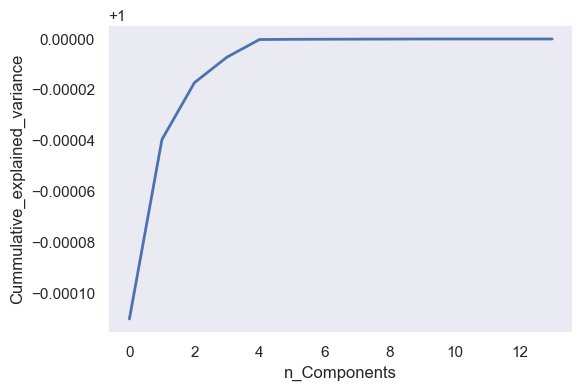

In [38]:
pca = PCA()
pca.n_components = 14
pca_data  = pca.fit_transform(data_lof)


percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_Components')
plt.ylabel('Cummulative_explained_variance')
plt.show()


**t-SNE seprability visualization**

In [39]:
def tsne_vis(data):
    data2 = data.copy(deep=True)
    X=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    tsne = TSNE(n_components=2, n_iter = 1000, perplexity = 300, random_state=42)
    # Fit and transform your data to the lower-dimensional space
    X_tsne = tsne.fit_transform(X)

    # Now, X_tsne contains the lower-dimensional representation of your data

    # Visualize the t-SNE results (scatter plot)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)  # Assuming 'y' is your target variable for coloring points
    plt.title("t-SNE Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

## **Models**

**Generic Codes**


*One_hot_encoding*

In [40]:
def one_hot_encoding(data):
  data2 = data.copy(deep=True)
  categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active']
  data2 = pd.get_dummies(data, columns=categorical_columns,drop_first=True)
  temp=data2.pop('cardio')
  data2['cardio']=temp
  return data2

*K-fold on PCA*

In [41]:
def find_optimal_pca_components(X_train,Y_train,model):
    n_components = list(range(1, X_train.shape[1] + 1))
    pca = PCA()
    # Create a pipeline with PCA and the classifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('model', model)
    ])

    # Define the grid of parameters to search over
    param_grid = {
        'pca__n_components': n_components,
    }

    grid_search = GridSearchCV(pipeline, param_grid,verbose=4,cv=10,n_jobs=12)

    grid_search.fit(X_train, Y_train)

    print(f'Optimal number of components: {grid_search.best_params_["pca__n_components"]}')
    print(f'Cross-validation score: {grid_search.best_score_}')
    return (grid_search.best_params_["pca__n_components"],grid_search.best_score_)

*Train-Test-Split (normal data)*

In [42]:
def find_train_test_split(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,2,3,4,5,11,12])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

Train-Test-Split (Test Data)

In [43]:
def find_train_test_split2(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,1,2,3,4,5,6])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

*Naive Bayes*

In [44]:
def naive_bayes(X_train,X_test,y_train,y_test):


# Create and train the Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gnb.predict(X_test)
    y_pred_train = gnb.predict(X_train)

    accuracy = metrics.accuracy_score(y_train, y_pred_train)
    recall = metrics.recall_score(y_train,y_pred_train)
    f1 = metrics.f1_score(y_train,y_pred_train)
    precision = metrics.precision_score(y_train,y_pred_train)
    print("-----------------Training Data Metrics : --------------------------------")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)
    print("Confusion Matrix : ")
    print(metrics.confusion_matrix(y_pred_train,y_train))
    print()
    # Evaluate the model
    print("-------------------Testing Data Metrics-------------------")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    print("Confusion Matrix : ")
    print(metrics.confusion_matrix(y_pred,y_test))

    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)


*ROC Curve*

In [45]:
def plot_roc(X_train,X_test,Y_Train,Y_Test,model):
  model.fit(X_train,Y_train)
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_proba)
  plt.plot(fpr,tpr)
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title("ROC Curve")
  plt.show()

*Logistic Regression*

In [46]:
def logistic_regression(X_Train,X_Test,Y_Train,Y_Test,threshold_probability):
  model = LogisticRegression()
  model.fit(X_train,Y_train)
  probs_train = model.predict_proba(X_train)
  y_predict_train = (probs_train[:,1]>=threshold_probability).astype('int')

  probs_test = model.predict_proba(X_test)
  y_predict_test = (probs_test[:,1]>=threshold_probability).astype('int')

  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_train,Y_train))
  print("Precision = ",metrics.precision_score(y_predict_train,Y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,Y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,Y_train))

  print(metrics.confusion_matrix(y_predict_train,Y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,Y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,Y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,Y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,Y_test))

  print(metrics.confusion_matrix(y_predict_test,Y_test))

*PCA*

In [47]:
def find_pca(X_train,X_test,Y_train,Y_test,model):
  pca = PCA()
  pca.n_components=find_optimal_pca_components(X_train,Y_train,model)[0]
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  return (X_train_pca,X_test_pca,Y_train,Y_test)

SVM

In [48]:
def SVM_generic(X_train,X_test,y_train,y_test,_kernel):
  # target_column = 'cardio'

  # svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
  svm_model = SVC(kernel=_kernel)
  svm_model.fit(X_train, y_train)
  y_predict_test = svm_model.predict(X_test)
  y_predict_train = svm_model.predict(X_train)


  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_train,y_predict_train))
  print("Precision = ",metrics.precision_score(y_predict_train,y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,y_train))

  print(metrics.confusion_matrix(y_predict_train,y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,y_test))

  print(metrics.confusion_matrix(y_predict_test,y_test))

**Naive Bayes**

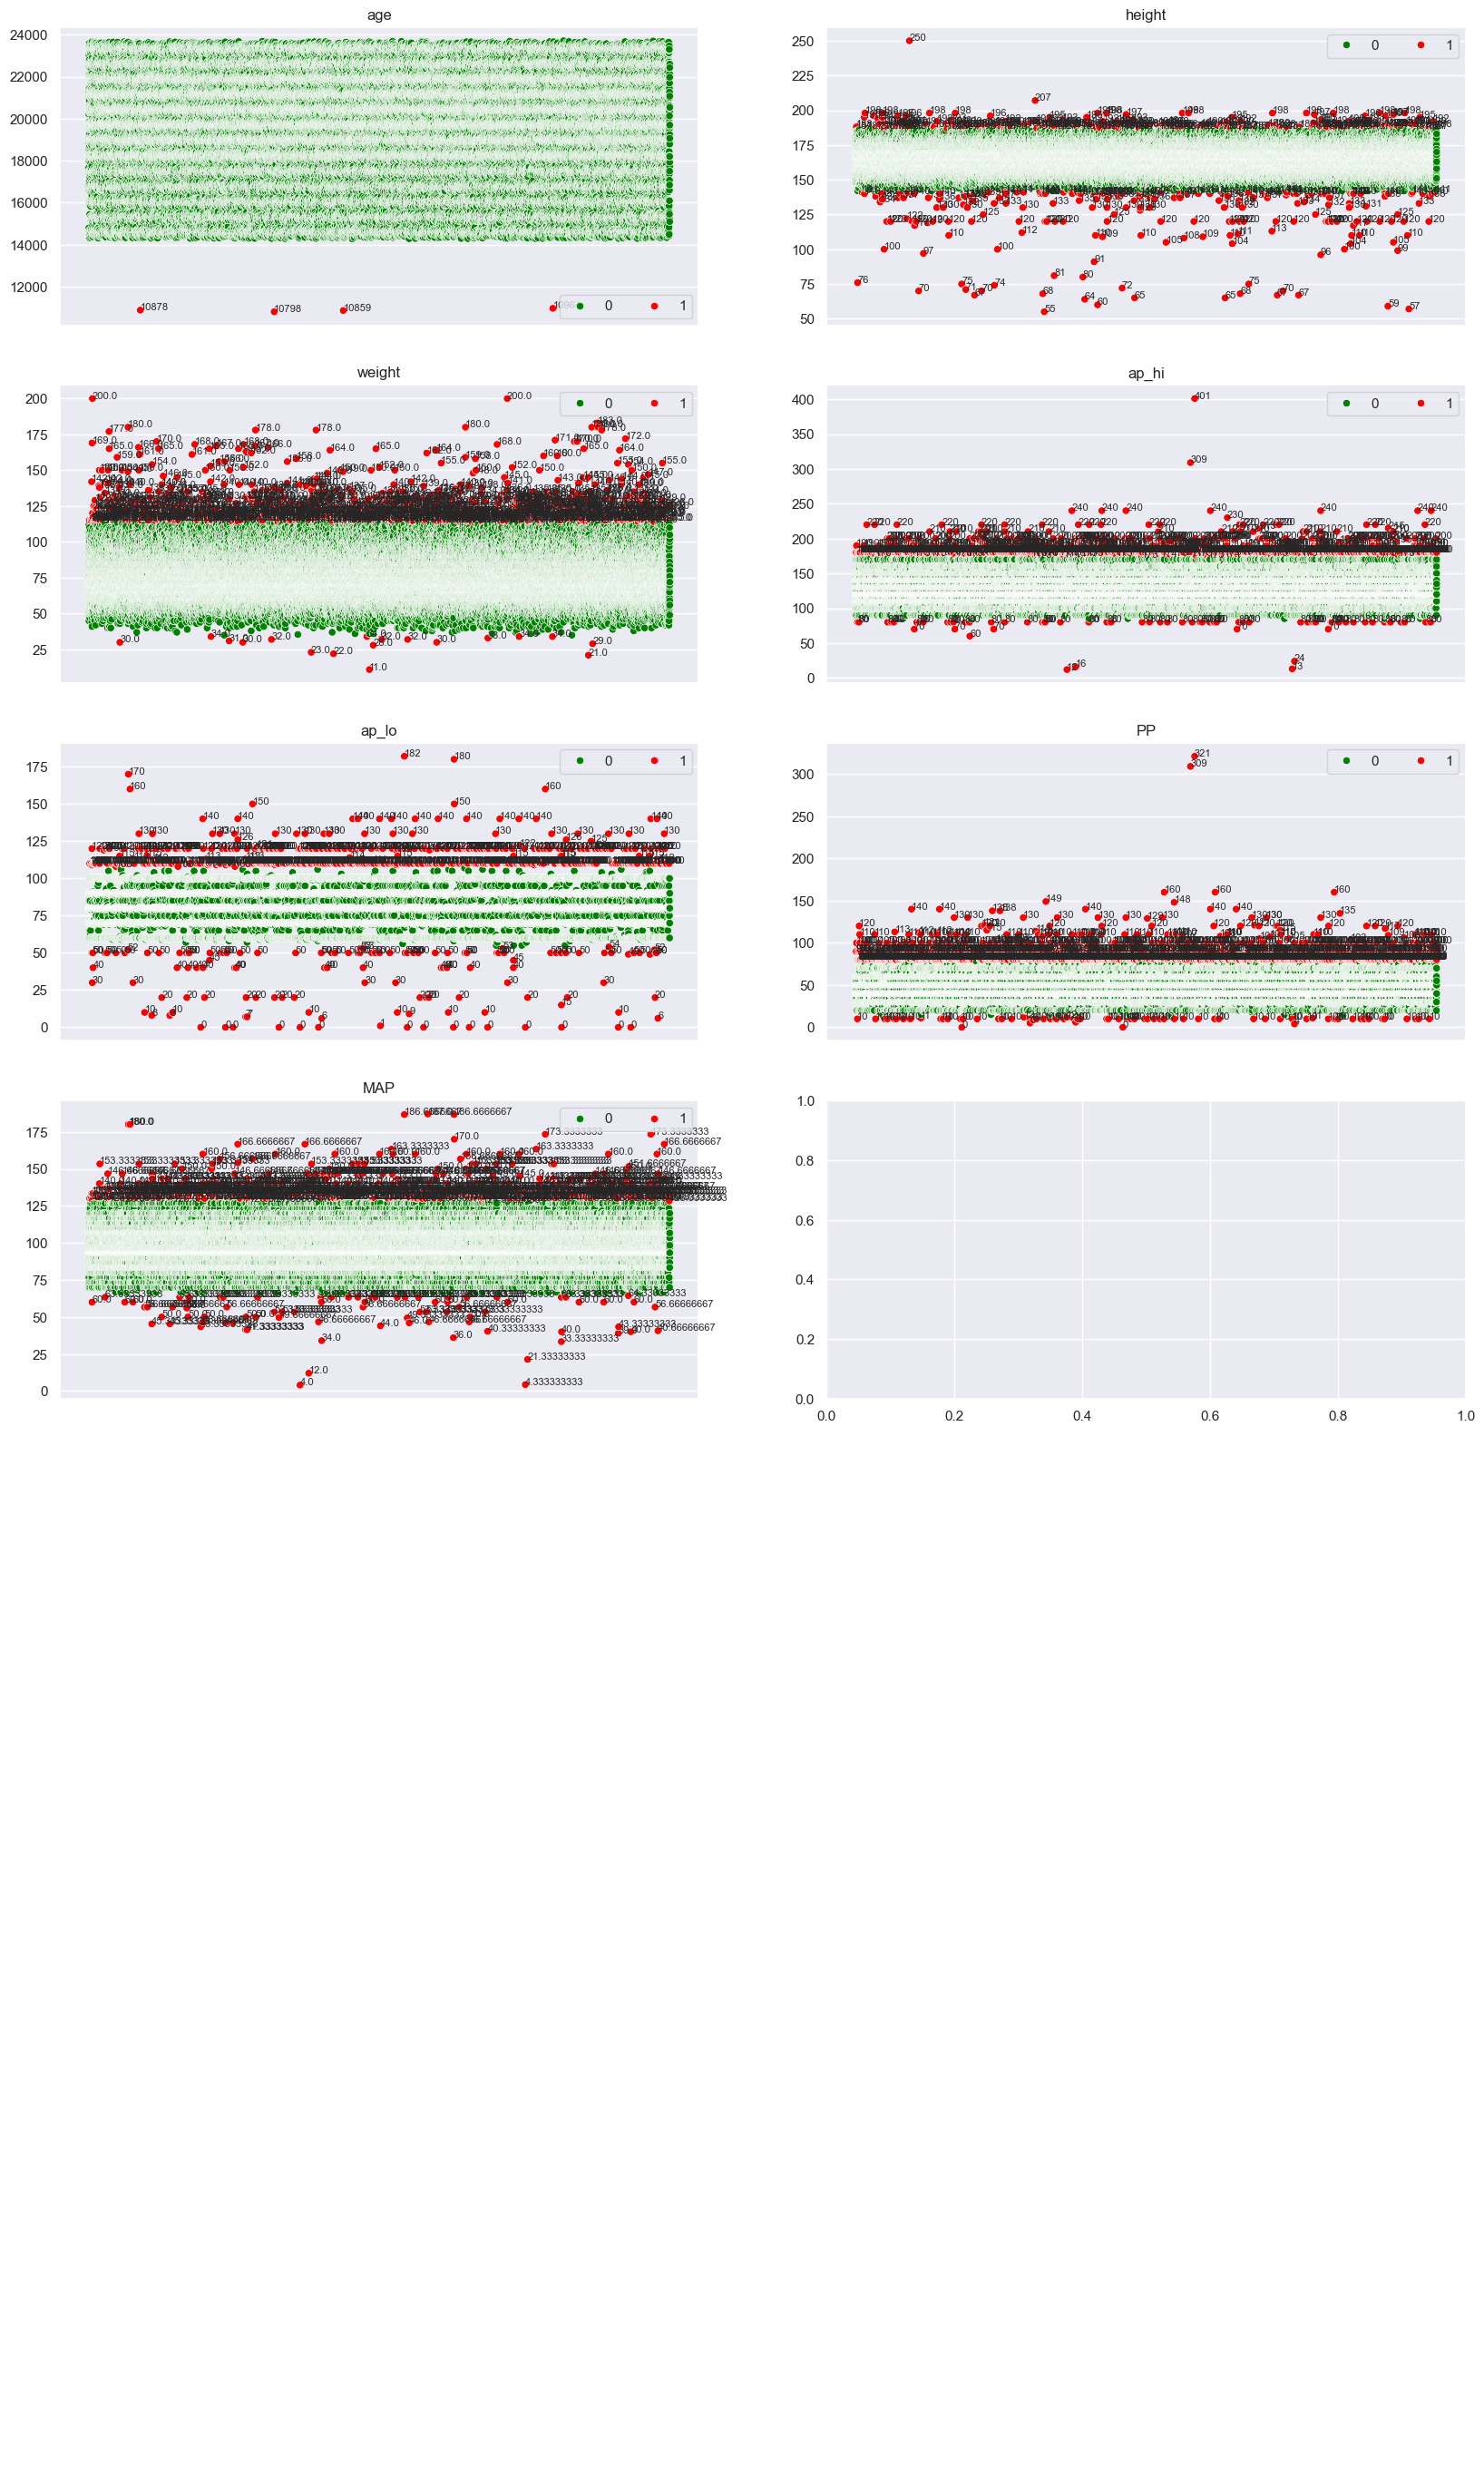

In [78]:
data_zscore = zscore_function(data)

*Z-Score*

Standerdized Data

In [81]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7209716030131992
Recall: 0.6159974360148345
f1: 0.6792719561760028
Precision: 0.7570335358991672
Confusion Matrix : 
[[19374  8387]
 [ 4318 13454]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[8227 3638]
 [1842 5808]]
Accuracy: 0.7191903663848321
Recall: 0.6148634342578869
f1: 0.6794571829667759
Precision: 0.7592156862745097


Standardized Data + One Hot

In [82]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7169086157292514
Recall: 0.6113273201776476
f1: 0.6744456230742032
Precision: 0.752098236917704
Confusion Matrix : 
[[19291  8489]
 [ 4401 13352]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[8182 3695]
 [1887 5751]]
Accuracy: 0.7139636177299513
Recall: 0.6088291340249842
f1: 0.6732615312573168
Precision: 0.7529457973291438


Standerdized Data + One Hot + PCA

In [84]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Optimal number of components: 3
Cross-validation score: 0.7127571419848848
-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7126040454176092
Recall: 0.5841765486928254
f1: 0.6610195834628536
Precision: 0.7611406072898645
Confusion Matrix : 
[[19688  9082]
 [ 4004 12759]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[8363 3943]
 [1706 5503]]
Accuracy: 0.7105303612605688
Recall: 0.5825746347660385
f1: 0.6608225758030621
Precision: 0.763351366347621


*LOF*

Standerdized Data

In [85]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.727511302811412
Recall: 0.6403445055515202
f1: 0.7018282107418043
Precision: 0.776372900547273
Confusion Matrix : 
[[15657  6932]
 [ 3555 12342]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6577 2963]
 [1468 5487]]
Accuracy: 0.7313731433767808
Recall: 0.6493491124260355
f1: 0.7123661148977606
Precision: 0.7889288281811646


Standerdized + One Hot Encoded Data

In [87]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7236657485839006
Recall: 0.6371796202137595
f1: 0.6978435662130296
Precision: 0.7712742573635621
Confusion Matrix : 
[[15570  6993]
 [ 3642 12281]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6553 2977]
 [1492 5473]]
Accuracy: 0.7290694149742346
Recall: 0.6476923076923077
f1: 0.7100875770353552
Precision: 0.7857860732232591


Standerdized + One Hot Encoded Data + PCA

In [88]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Optimal number of components: 3
Cross-validation score: 0.7215613689113299
-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7217169879956348
Recall: 0.6343779184393483
f1: 0.6954271413946082
Precision: 0.7694776589049717
Confusion Matrix : 
[[15549  7047]
 [ 3663 12227]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6534 3020]
 [1511 5430]]
Accuracy: 0.7253107002121855
Recall: 0.642603550295858
f1: 0.7056071730231953
Precision: 0.782308024780291


**Logistic Regression**

*Z-Score*

Plotting ROC Curve

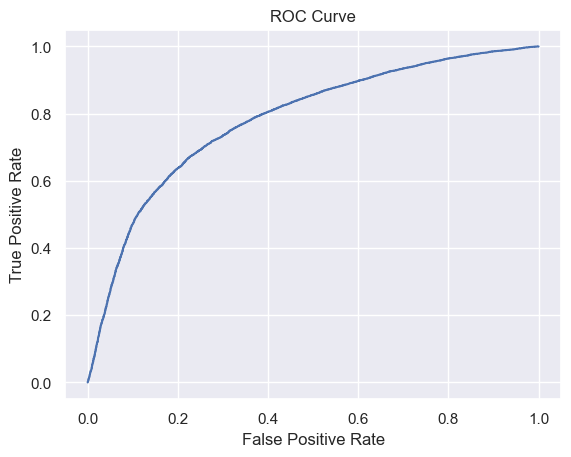

In [89]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
plot_roc(X_train,X_test,Y_train,Y_test,LogisticRegression())

Standerdized Data

In [90]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.724441613774625
Precision =  0.6480014651343803
Recall =  0.7444245739532926
F1 Score =  0.6928744523046042
[[18833  7688]
 [ 4859 14153]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7206764027671022
Precision =  0.6433410967605335
Recall =  0.7448216693222208
F1 Score =  0.6903720533939222
[[7987 3369]
 [2082 6077]]


Standerdized + One Hot Encoded Data

In [91]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.7251004765774274
Precision =  0.6470399706973123
Recall =  0.7461457233368533
F1 Score =  0.6930678502243691
[[18884  7709]
 [ 4808 14132]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7219574686138868
Precision =  0.6438704213423672
Recall =  0.7468074656188605
F1 Score =  0.691529277998863
[[8007 3364]
 [2062 6082]]


Standerdized + One Hot + PCA

In [92]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Optimal number of components: 13
Cross-validation score: 0.7247484200381955
---------------Training Data Metrics-----------------------
Accuracy  =  0.7251004765774274
Precision =  0.6470399706973123
Recall =  0.7461457233368533
F1 Score =  0.6930678502243691
[[18884  7709]
 [ 4808 14132]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7219574686138868
Precision =  0.6438704213423672
Recall =  0.7468074656188605
F1 Score =  0.691529277998863
[[8007 3364]
 [2062 6082]]


*LOF*

Plotting ROC Curve

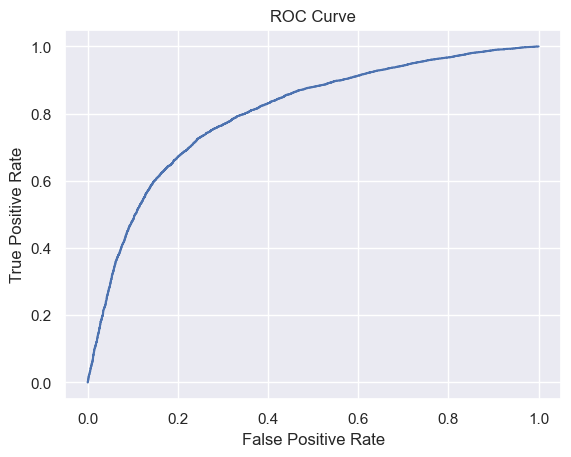

In [93]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
plot_roc(X_train,X_test,Y_train,Y_test,LogisticRegression())

Standerdized Data

In [94]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.7311230057683313
Precision =  0.6810729480128671
Recall =  0.7575600184672207
F1 Score =  0.7172832085678379
[[15011  6147]
 [ 4201 13127]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7350106092755381
Precision =  0.6902958579881657
Recall =  0.7688150784236194
F1 Score =  0.7274427885514747
[[6291 2617]
 [1754 5833]]


Standarderdized Data + One Hot Encoded Data

In [95]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.731694642207556
Precision =  0.6808135311819031
Recall =  0.758672525439408
F1 Score =  0.7176374077112386
[[15038  6152]
 [ 4174 13122]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7371324643831464
Precision =  0.6914792899408284
Recall =  0.7716587427363972
F1 Score =  0.7293721133441518
[[6316 2607]
 [1729 5843]]


Standerdized + One Hot Encoded Data + PCA

In [96]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Optimal number of components: 13
Cross-validation score: 0.731616927797754
---------------Training Data Metrics-----------------------
Accuracy  =  0.731694642207556
Precision =  0.6808135311819031
Recall =  0.758672525439408
F1 Score =  0.7176374077112386
[[15038  6152]
 [ 4174 13122]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7370112155198545
Precision =  0.6913609467455621
Recall =  0.771526677231907
F1 Score =  0.7292472849831482
[[6315 2608]
 [1730 5842]]


**Support Vector Machine**


*Z-Score*

Standardized Data

In [97]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

---------------Training Data Metrics-----------------------
Accuracy  =  0.7312059385500626
Precision =  0.6391648734032325
Recall =  0.7620919314335626
F1 Score =  0.6952364351701984
[[19334  7881]
 [ 4358 13960]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7281065846784525
Precision =  0.6338132542875291
Recall =  0.7642328312484044
F1 Score =  0.6929398148148148
[[8222 3459]
 [1847 5987]]


Standarderdized Data + One Hot Encoded

In [98]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

---------------Training Data Metrics-----------------------
Accuracy  =  0.7325017020622405
Precision =  0.6450254109244082
Recall =  0.7608965703483662
F1 Score =  0.6981861433244129
[[19265  7753]
 [ 4427 14088]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7274404304381246
Precision =  0.6393182299385983
Recall =  0.7595271035089926
F1 Score =  0.6942576306259699
[[8157 3407]
 [1912 6039]]


Standarderdized Data + One Hot Encoded + PCA

In [99]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,SVC(kernel='rbf'))
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

Fitting 10 folds for each of 15 candidates, totalling 150 fits


Optimal number of components: 15
Cross-validation score: 0.7287893690676376
---------------Training Data Metrics-----------------------
Accuracy  =  0.7330287923044825
Precision =  0.6456664072157868
Recall =  0.761488201306766
F1 Score =  0.698810703666997
[[19275  7739]
 [ 4417 14102]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7276454009736101
Precision =  0.6395299597713318
Recall =  0.7597786441956986
F1 Score =  0.6944875553256308
[[8159 3405]
 [1910 6041]]


In [100]:
display(data_zscore_one_hot_pca)
display(data)
display(data_zscore)

age  height  weight  ap_hi  ap_lo    PP         MAP  gender_2  \
0      18393.0   168.0    62.0  110.0   80.0  30.0   90.000000         1   
1      20228.0   156.0    85.0  140.0   90.0  50.0  106.666667         0   
2      18857.0   165.0    64.0  130.0   70.0  60.0   90.000000         0   
3      17623.0   169.0    82.0  150.0  100.0  50.0  116.666667         1   
4      17474.0   156.0    56.0  100.0   60.0  40.0   73.333333         0   
...        ...     ...     ...    ...    ...   ...         ...       ...   
69993  19699.0   172.0    70.0  130.0   90.0  40.0  103.333333         0   
69994  21074.0   165.0    80.0  150.0   80.0  70.0  103.333333         0   
69995  19240.0   168.0    76.0  120.0   80.0  40.0   93.333333         1   
69998  22431.0   163.0    72.0  135.0   80.0  55.0   98.333333         0   
69999  20540.0   170.0    72.0  120.0   80.0  40.0   93.333333         0   

       cholesterol_2  cholesterol_3  gluc_2  gluc_3  smoke_1  alco_1  \
0                  0              0       0       0        0       0   
1                  0              1       0       0        0       0   
2                  0              1       0       0        0       0   
3                  0              0       0       0        0       0   
4                  0              0       0       0        0       0   
...              ...            ...     ...     ...      ...     ...   
69993              0              0       0       0        0       0   
69994              0              0       0       0        0       0   
69995              0              0       0       0        1       0   
69998              0              0       1       0        0       0   
69999              1              0       0       0        0       0   

       active_1  cardio  
0             1       0  
1             1       1  
2             0       1  
3             1       1  
4             0       0  
...         ...     ...  
69993         1       1  
69994         1       1  
69995         1       0  
69998         0       1  
69999         1       0  

[65048 rows x 16 columns]

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
0         0       1  30   90.000000       0  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
...     ...     ...  ..         ...     ...  
69995     0       1  40   93.333333       0  
69996     0       1  50  106.666667       1  
69997     1       0  90  120.000000       1  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[68727 rows x 14 columns]

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      18393.0       2   168.0    62.0  110.0   80.0            1     1   
1      20228.0       1   156.0    85.0  140.0   90.0            3     1   
2      18857.0       1   165.0    64.0  130.0   70.0            3     1   
3      17623.0       2   169.0    82.0  150.0  100.0            1     1   
4      17474.0       1   156.0    56.0  100.0   60.0            1     1   
...        ...     ...     ...     ...    ...    ...          ...   ...   
69993  19699.0       1   172.0    70.0  130.0   90.0            1     1   
69994  21074.0       1   165.0    80.0  150.0   80.0            1     1   
69995  19240.0       2   168.0    76.0  120.0   80.0            1     1   
69998  22431.0       1   163.0    72.0  135.0   80.0            1     2   
69999  20540.0       1   170.0    72.0  120.0   80.0            2     1   

       smoke  alco  active    PP         MAP  cardio  
0          0     0       1  30.0   90.000000       0  
1          0     0       1  50.0  106.666667       1  
2          0     0       0  60.0   90.000000       1  
3          0     0       1  50.0  116.666667       1  
4          0     0       0  40.0   73.333333       0  
...      ...   ...     ...   ...         ...     ...  
69993      0     0       1  40.0  103.333333       1  
69994      0     0       1  70.0  103.333333       1  
69995      1     0       1  40.0   93.333333       0  
69998      0     0       0  55.0   98.333333       1  
69999      0     0       1  40.0   93.333333       0  

[65048 rows x 14 columns]

*LOF*

Standerdized Data

In [101]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

---------------Training Data Metrics-----------------------
Accuracy  =  0.7370212544821494
Precision =  0.682110615336723
Recall =  0.766991424070941
F1 Score =  0.7220650830701633
[[15218  6127]
 [ 3994 13147]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.738890572900879
Precision =  0.6892307692307692
Recall =  0.7760159893404397
F1 Score =  0.7300532748354747
[[6364 2626]
 [1681 5824]]


Standarderdized Data + One Hot Encoded

In [102]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

---------------Training Data Metrics-----------------------
Accuracy  =  0.7378267421919659
Precision =  0.683407699491543
Recall =  0.7675990675990676
F1 Score =  0.7230608772026129
[[15224  6102]
 [ 3988 13172]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7392543194907548
Precision =  0.6900591715976331
Recall =  0.776121389591375
F1 Score =  0.7305644302449413
[[6363 2619]
 [1682 5831]]


Standerdized Data + One Hot Encoded + PCA

In [103]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,SVC(kernel='rbf'))
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Optimal number of components: 12
Cross-validation score: 0.7354365404735631
---------------Training Data Metrics-----------------------
Accuracy  =  0.7377747752429454
Precision =  0.6838227664210854
Recall =  0.7672604494120386
F1 Score =  0.7231427630857018
[[15214  6094]
 [ 3998 13180]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7388299484692331
Precision =  0.6899408284023668
Recall =  0.7754722000532056
F1 Score =  0.7302104208416833
[[6357 2620]
 [1688 5830]]
